# Определение выгодного тарифа для телеком компании

### Описание проекта
Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов
**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- Минута разговора — 3 рубля. Количество использованных минут и мегабайтов «Мегалайн» всегда округляет вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.
- Сообщение — 3 рубля.
- 1 Гб интернет-трафика — 200 рублей.

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- Минута разговора — 1 рубль;
- Сообщение — 1 рубль;
- 1 Гб интернет-трафика: 150 рублей.

### Описание данных
Данные предоставлены в 5-ти файлах: `calls.csv`, `internet.csv`, `messages.csv`, `tariffs.csv`, `users.csv`.

В файле `calls.csv` содержатся:
- `id` - ID звонка
- `call_date` - дата совершения звонка
- `duration` - продолжительность звонка
- `user_id` - ID пользователя

В файле `internet.csv` содержатся:
- `id` - ID сессии
- `mb_used` - к-во использованных МБ
- `session_date` - дата сессии
- `user_id` - ID пользователя

В файле `messages.csv` содержатся:
- `id` - ID сообщения
- `message_date` - дата отправки сообщения
- `user_id` - ID пользователя

В файле `tariffs.csv` содержатся:
- `messages_included` - к-во сообщений, включенное в тариф
- `mb_per_month_included` - к-во МБ, включенное в тариф
- `minutes_included` - к-во минут, включенное в тариф
- `rub_monthly_fee` - стоимость тарифа в месяц (в рублях)
- `rub_per_gb` - стоимость 1ГБ сверх тарифа
- `rub_per_message` - стоимость 1 сообщения сверх тарифа
- `rub_per_minute` - стоимость 1 минуты сверх тарифа
- `tariff_name` - наименование тарифа

В файле `users.csv` содержатся:
- `user_id` - ID пользователя
- `age` - возраст пользователя
- `churn_date` - дата, в которую пользователь прекратил пользоваться услугами
- `city` - город
- `first_name` - Имя
- `last_name` - фамилия
- `reg_date` - дата регистрации (начала пользования услугами)
- `tariff` - подключенный тариф

### Задача проекта
Необходимо выяснить, какой тариф более прибылен для компании.

### Ход проекта
1. Ознакомление с данными и предобработка
2. Анализ данных и подсчёт выручки
3. Проверка статистических гипотез
5. Общий вывод

In [1]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

## Ознакомление с данными и предобработка

In [2]:
def open_file(name):
    
    # принимает наименование файла, открывает его из папки datasets на портале и локально
    try:
        data = pd.read_csv('datasets/'+name)
    except:
        data = pd.read_csv('/datasets/'+name)
        
    return data

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


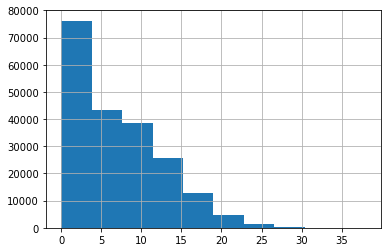

In [3]:
# ознакомление с данными файла calls
calls = open_file('calls.csv')
display(calls.head())
calls.info()
calls['duration'].hist()
plt.show()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


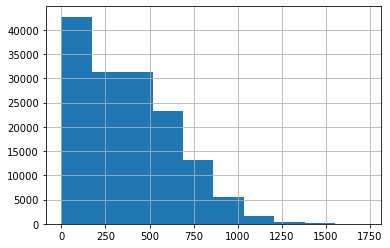

In [4]:
# ознакомление с данными файла internet
sessions = open_file('internet.csv')
display(sessions.head())
sessions.info()
sessions['mb_used'].hist()
plt.show()

In [5]:
# ознакомление с данными файла messages
messages = open_file('messages.csv')
display(messages.head())
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
# ознакомление с данными файла messages
tariffs = open_file('tariffs.csv')
display(tariffs.head())
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
# ознакомление с данными файла messages
users = open_file('users.csv')
display(users.head())
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Предобработка данных
В столбцах 
- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`
- `call_date` из таблицы `calls`
- `message_date` из таблицы `messages`
- `session_date` из таблицы `sessions`

тип данных не соответствует содержанию. Приведем указанные столбцы к типу дата.

In [8]:
# приведение данных в столбцах к типу дата
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT%H:%M:%S')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%dT%H:%M:%S')
print('Completed!')

Completed!


В столбце `duration` датафрейма `calls` значения дробные. Но известно, что любое количество секунд оплачивается как целая минута, поэтому округлим вверх до целого значения столбца `duration`.

In [9]:
# округление значений столбца duration с помощью np.ceil() и приведение типа к int
calls['duration'] = np.ceil(calls['duration']).astype(int)
print('Completed!')

Completed!


В датафрейме `sessions`содержится столбец `Unnamed: 0`. В нем находятся номера строк, при этом в датафрейме уже имеются индексы. Таким образом, столбец `Unnamed: 0` ненужен и его можно удалить.

In [10]:
sessions = sessions.drop('Unnamed: 0', axis=1)
print('Completed!')

Completed!


### Создание фич и дополнительных переменных для дальнейших расчетов

Для дальнейшего анализа разобъем на составляющие даты в таблицах (создадим колонки для месяца, чтобы иметь возможность посмотреть расход пакетов за месяц):

In [11]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
sessions['month'] = sessions['session_date'].dt.month
print('Completed!')

Completed!


Теперь для каждой из таблиц найдем, сколько минут, МБ и сообщений израсходовал каждый пользователь за каждый месяц своего пользования услугами компании.

In [12]:
# подсчёт количества звонков для каждого пользователя по месяцам
calls_per_month = (calls
                   .groupby(['user_id', 'month'])
                   .agg(calls=('duration', 'count'))
)

calls_per_month.head(20)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108

In [13]:
# подсчёт израсходованных минут для каждого пользователя по месяцам
minutes_per_month = (calls
                   .groupby(['user_id', 'month'])
                   .agg(minutes=('duration', 'sum'))
)

minutes_per_month.head(20)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855

In [14]:
# подсчёт количества отправленных сообщений для каждого пользователя по месяцам
messages_per_month = (messages
                   .groupby(['user_id', 'month'])
                   .agg(messages=('message_date', 'count'))
)

messages_per_month.head(20)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75

In [15]:
# подсчёт потраченных мегабайт для каждого пользователя по месяцам
sessions_per_month = (sessions
                   .groupby(['user_id', 'month'])
                   .agg({'mb_used': 'sum'})
)

sessions_per_month.head(20)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14

## Анализ данных и подсчёт выручки
### Создание статистических метрик и расчетных столбцов для дальнейшего анализа
Узнаем, какая доля клиентов откзалась от услуг компании.

In [16]:
percent = 100*users['churn_date'].count()/users['churn_date'].shape[0]
print('Прекратили пользоваться услугами компании', percent, '% пользователей (из представленных в датасете)')

Прекратили пользоваться услугами компании 7.6 % пользователей (из представленных в датасете)


Для дальнейшего анализа поведения пользователей объединдим все посчитанные в предыдущем разделе значения в один датафрейм `user_behavior`:

In [17]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим и скорректируем пропуски в таблице `user_behavior` после объединения:

In [18]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [19]:
# заполним пропуски
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

print('Completed!')

Completed!


Присоединим информацию о тарифах, используемых каждым клиентом:

In [20]:
# переименование столбца tariff_name на более простое tariff
tariffs = tariffs.rename(
    columns={
        'tariff_name': 'tariff'
    }
)

user_behavior = user_behavior.merge(tariffs, on='tariff')

print('Completed!')

Completed!


Создадим расчетные столбцы, которые лучше помогут понять поведение клиентов:
- 'paid_minutes', 'paid_messages' и 'paid_mb' - показывают, сколько минут, сообщений и МБ пользователи тратят сверх пакета
- 'cost_minutes', 'cost_messages', 'cost_gb' - показывают, какую выручку получила компания получила с каждого пользователя по каждому виду расходов
- 'total_cost' - суммарная выручка с каждого пользователя

In [21]:
# расчитываем, сколько каждый пользователь расходует сверх пакета
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0
    
# переводим превышающие тариф мегабайты в гигабайты, т.к. в компании тарифицируются гигабайты
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

# считаем выручку, полученную с каждого пользователя по каждому виду расходов
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

# считаем помесячную выручку с каждого пользователя, она будет храниться в столбец total_cost
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,...,rub_per_message,rub_per_minute,paid_minutes,paid_messages,paid_mb,paid_gb,cost_minutes,cost_messages,cost_gb,total_cost
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.0,0,0.0,0.0,0,1950.0


Создадим датафрейм `stats_df`, который будет хранить статистические метрики для каждой пары месяц-тариф (среднее значение, стандартное отклонение, медиана).

In [22]:
stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head()

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0


### Анализ данных
Начнем со сравнения показателей двух тарифов.

#### Распределение среднего количества звонков по видам тарифов и месяцам

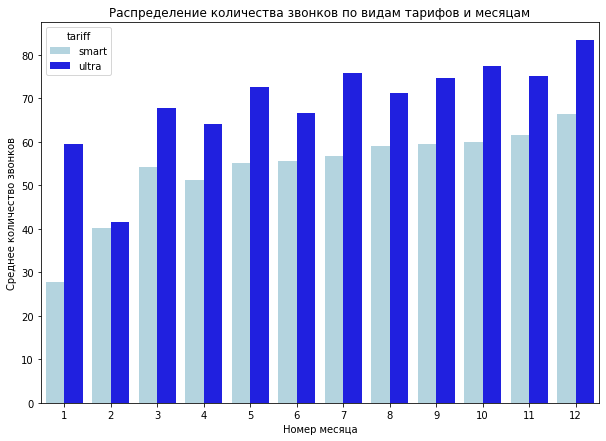

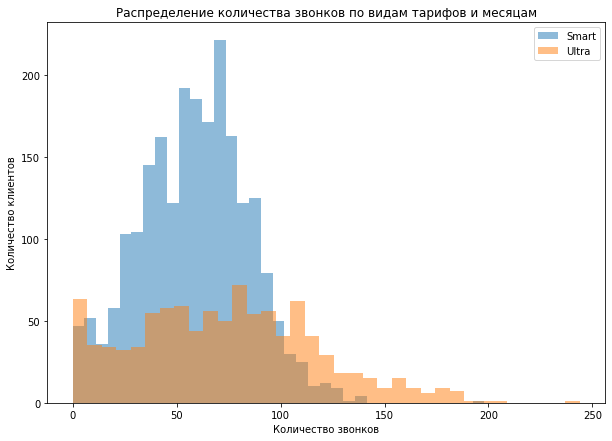

In [23]:
# Распределение среднего количества звонков по видам тарифов и месяцам
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');
plt.show()

plt.figure(figsize=(10, 7))
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.title('Распределение количества звонков по видам тарифов и месяцам')
plt.show()

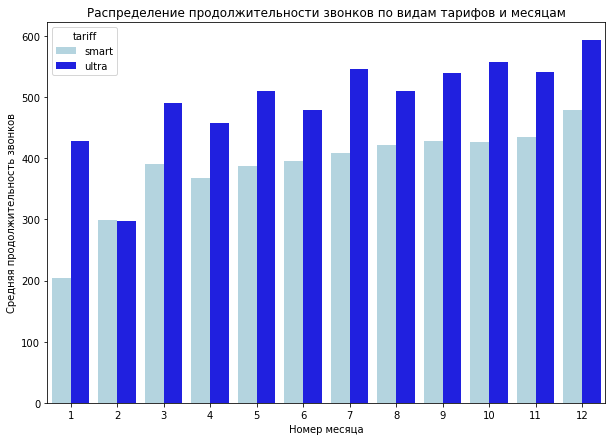

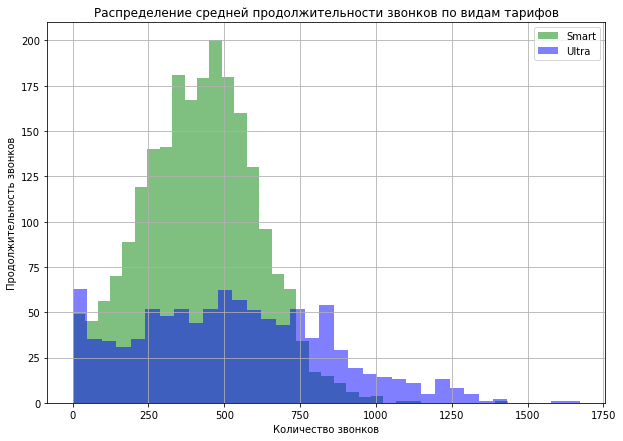

In [24]:
# Распределение средней продолжительности звонков по видам тарифов и месяцам
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');
plt.show()

plt.figure(figsize=(10, 7))
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue')
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Продолжительность звонков')
plt.title('Распределение средней продолжительности звонков по видам тарифов')
plt.show()

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.

#### Распределение среднего количества сообщений по видам тарифов и месяцам

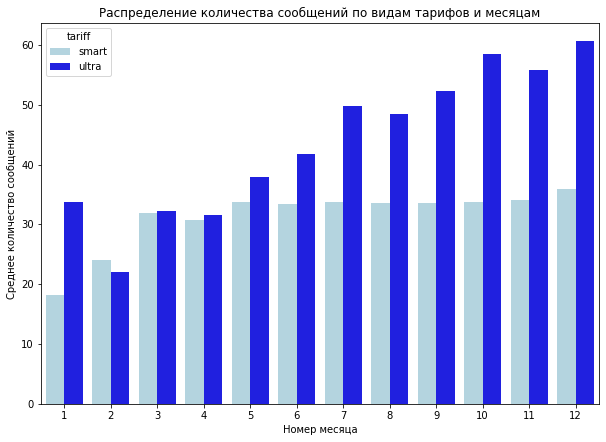

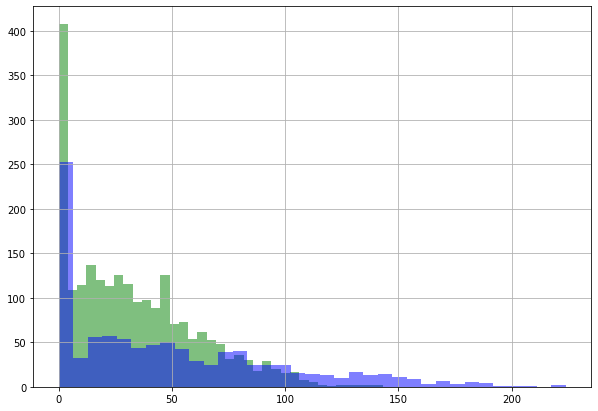

In [25]:
# Распределение среднего количества сообщений по видам тарифов и месяцам
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');
plt.show()

plt.figure(figsize=(10, 7))
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');
plt.show()

В среднем количество сообщений пользователи тарифа Ultra отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифак растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную положительную динамику.

#### Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам

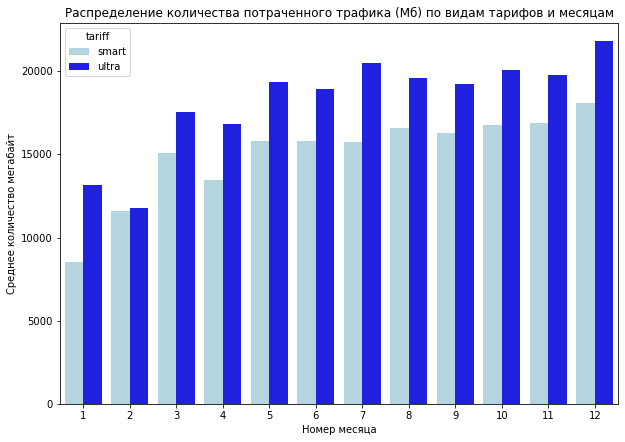

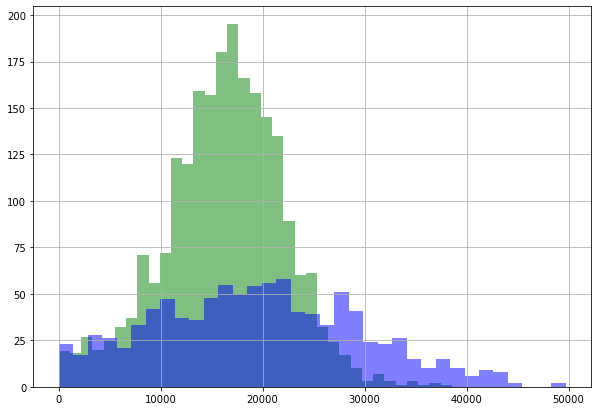

In [26]:
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');
plt.show()

plt.figure(figsize=(10, 7))
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');
plt.show()

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.

## Проверка гипотез
Для того, чтобы ответить на главный вопрос клиента "какой из тарифов выгоднее", имея только ограниченную выборку данных, воспользуемся методами статистического анализа. Для этого сформируем и проверим несколько гипотез, касающихся различия двух тарифов. Считаем достаточной достоверность 95%, поэтому пороговое значение альфа будет задано 0.05 для каждой гипотезы.

In [27]:
# зададим порог альфа
ALPHA = 0.05

###  Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
Проверим гипотезу, что средняя выручка с пользователей тарифов «Ультра» и «Смарт» различается. Для этого сформируем гипотезу:
```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`
alpha = 0.05
```

In [28]:
results = st.ttest_ind(user_behavior.query('tariff == "smart"')['total_cost'],
                       user_behavior.query('tariff == "ultra"')['total_cost'],
                       equal_var=False
)

print('p-value = ', results.pvalue)

if results.pvalue < ALPHA:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value =  4.2606313931076085e-250
Отвергаем нулевую гипотезу


Значит, можем говорить о различии средней выручки, приносимой пользователями обоих тарифов.

### Проверка гипотезы: пользователи из Москвы приносят больше выручки, чем пользователи из других городов
Проверим гипотезу, что средняя выручка с пользователей из Москвы и других городв различается. Для этого сформируем гипотезу:
```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```

In [29]:
results = st.ttest_ind(user_behavior.query('city == "Москва"')['total_cost'],
                       user_behavior.query('city != "Москва"')['total_cost'],
                       equal_var=False
)

print('p-value = ', results.pvalue)

if results.pvalue < ALPHA:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-value =  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Значит, не можем утверждать, что пользователи из Москвы приносят выручку, отличную от других регионов.

## Общий вывод
В ходе проекта были проанализировны предоставленные компанией «Мегалайн» данные о двух тарифах, предоставляемых ее клиентам. 

В результате исследовательского анализа выяснилось, что:
- Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart;
- В среднем количество сообщений пользователи тарифа Ultra отправляют больше, чем пользователи Smart;
- Абоненты тарифа Smart в среднем тратят меньше ГБ, чем пользователи тарифного плана Ultra.

Из этих данных можно сделать первичный вывод, что пользователи тарифа Ultra тратят больше (а значит, и приносят больше выгоды). Но можем ли мы утвержать это для всех пользователей? 

Чтобы с высокой долей уверенности утверждать, что тариф Ultra выгоднее, воспользовались методами статистического анализа и проверили гипотезу о равенстве средней выручки пользователей двух тарифов. Гиоптеза о равенстве не подтвердилась и с надежностью 95% мы можем утверждать, что приносимые разными тарифами доходы не равны.

Суммируя вышесказанное, считаю, что тариф Ultra может считаться более выгодным.

Дополнительно была проверена гипотеза о равенстве выручки пользователей из Москвы и других регионов. Эта гипотеза подтвердилась и можно утверждать, что нет существенных различий в выручке, приносимой пользователями из столицы и других регионов.